In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 200)

In [2]:
df = pd.read_csv('../data/piano/dataset_abs.csv', index_col=0)

In [12]:
# kick out na entries and create df with only fourier spectrum as columns

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
is_number = [is_number(el) for el in df.columns]
fourier_cols = df.columns[is_number]
df = df[~df[fourier_cols[0]].isna()]
df = df[df['key_confidence'] > 0.5].reset_index(drop=True)
fourier_df = df[fourier_cols]
print(df.shape)
print(fourier_df.shape)

(570, 30026)
(570, 30001)


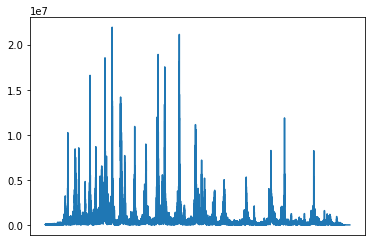

Song name: Song for Sienna
Key: 7
Max frequency: 219.36666666666667


In [22]:
sample_number = 10
spectrum = fourier_df.iloc[sample_number, :]
plt.plot(fourier_cols, spectrum)
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.show()

key = df['key'][sample_number]
name = df['song_name'][sample_number]
max_f = fourier_cols[spectrum.argmax()]
print(f'Song name: {name}')
print(f'Key: {key}')
print(f'Max frequency: {max_f}')

In [33]:
# Transform all keys to the relative major key
def modify_keys(df):
    df['key_modified'] = [(df['key'][index]+3) % 12 if mode==0 else df['key'][index] for index, mode in df['mode'].iteritems()]

    
# combine mode and key to one combined key_mode value
def combine_keys_and_modes(df):
    df['key_mode_combined'] = list(zip(df['key'], df['mode']))
    df['key_mode_combined'] = df['key_mode_combined'].apply(lambda x: x[0]+12 if x[1]==1 else x[0])
    
    
combine_keys_and_modes(df)    
modify_keys(df)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

X = fourier_df
y = df['key_mode_combined']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0, multi_class='ovr')
print('Starting CV...')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Starting CV...


D:\Uni Master\Data Literacy\Project\spotipy-env\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
D:\Uni Master\Data Literacy\Project\spotipy-env\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
D:\Uni Master\Data Literacy\Project\spotipy-env\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Mean Accuracy: 0.423 (0.047)


In [21]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.468 (0.074)


In [ ]:
df.info()